In [ ]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import cv2 as cv
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path_template="/content/drive/MyDrive/Colab Notebooks/Vision por computadora 1/template/pattern.png"
path_image1="/content/drive/MyDrive/Colab Notebooks/Vision por computadora 1/Images/coca_retro_1.png"
path_image2="/content/drive/MyDrive/Colab Notebooks/Vision por computadora 1/Images/coca_retro_2.png"
path_image3="/content/drive/MyDrive/Colab Notebooks/Vision por computadora 1/Images/coca_logo_1.png"
path_image4="/content/drive/MyDrive/Colab Notebooks/Vision por computadora 1/Images/coca_logo_2.png"
path_image5="/content/drive/MyDrive/Colab Notebooks/Vision por computadora 1/Images/COCA-COLA-LOGO.jpg"


In [11]:
# Verificar las dimensiones de las imágenes
imagen_objetivo = cv2.imread(path_image2)
print(imagen_objetivo.shape)

(429, 715, 3)


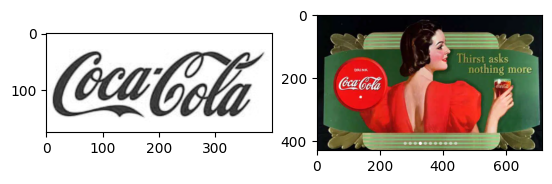

In [12]:
# Cargar la imagen de template y la imagen objetivo
img_rgb= cv.cvtColor(imagen_objetivo, cv.COLOR_BGR2RGB)
img_gray= cv.cvtColor(imagen_objetivo, cv.COLOR_BGR2GRAY)
template=cv2.imread(path_template,0)
plt.figure()
plt.subplot(1,2,1)
plt.imshow(template, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_rgb)


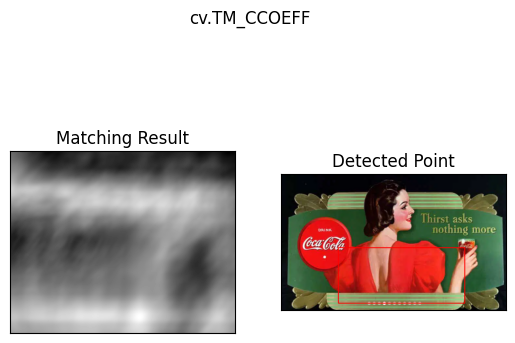

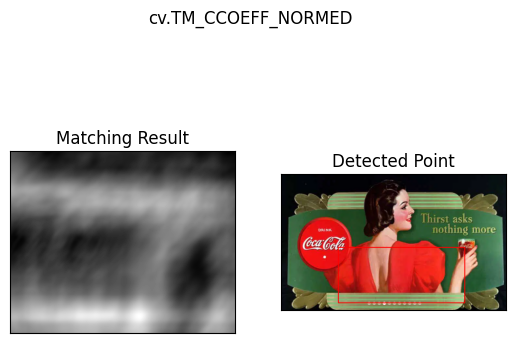

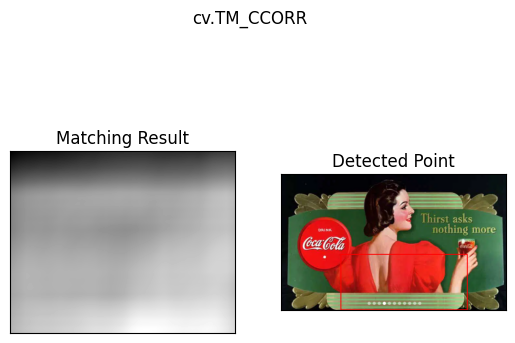

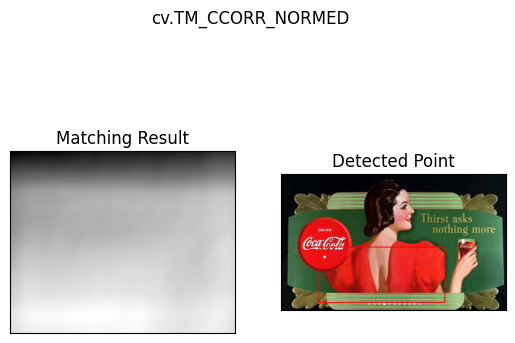

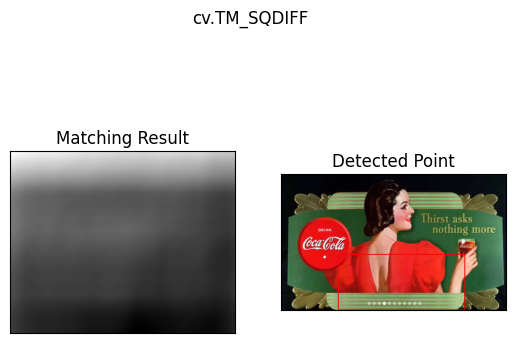

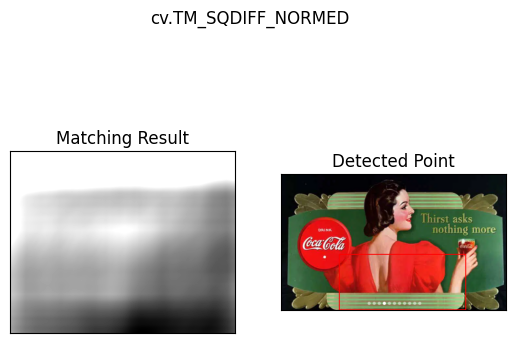

In [13]:
w, h = template.shape[::-1]
# Los 6 métodos posibles para comparación:
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    # Hago una copia de la imagen porque ciclo a ciclo le dibujo rectángulos
    img_salida = img_rgb.copy()

    method = eval(meth)

    # Aplicamos la coincidencia de patrones
    #--------------------------------------
    res = cv.matchTemplate(img_gray, template, method)

    # Encontramos los valores máximos y mínimos
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    # Si el método es TM_SQDIFF o TM_SQDIFF_NORMED, tomamos el mínimo
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    # Marcamos el lugar donde lo haya encontrado
    #----------------------------------------
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img_salida,top_left, bottom_right, 255, 2)

    # Graficamos el procesamiento y la salida
    #----------------------------------------
    plt.figure()

    # Resultado de coincidencia
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])

    # Imagen original con recuadros
    plt.subplot(122),plt.imshow(img_salida)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])

    plt.suptitle(meth)
    plt.show()

In [ ]:
# Verificar las dimensiones de las imágenes
print(template.shape)
print(imagen_objetivo.shape)


(175, 400)
(1389, 1389, 3)


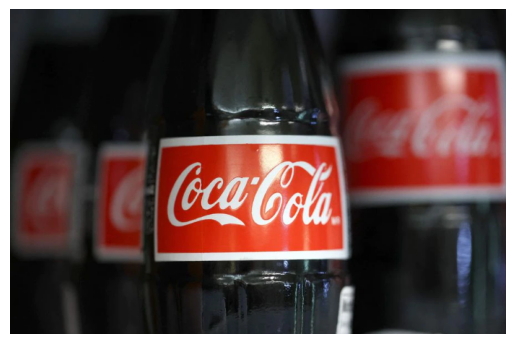

In [ ]:
# Obtener las dimensiones del template
alto, ancho = template.shape[::-1]

# Aplicar el método de coincidencia de plantilla
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)

# Establecer un umbral para la detección de logo
umbral = 0.8

# Encontrar las ubicaciones donde la coincidencia es mayor o igual que el umbral
ubicaciones = np.where(res >= umbral)

# Dibujar un rectángulo alrededor de cada ubicación de detección
for punto in zip(*ubicaciones[::-1]):
    cv2.rectangle(imagen_objetivo, punto, (punto[0] + ancho, punto[1] + alto), (0, 255, 0), 2)

# Mostrar la imagen con los logos detectados
plt.imshow(cv2.cvtColor(imagen_objetivo, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()